**Table of Contents**

1. Import Libraries
2. Load Data
3. Get some information about the data
4. Problem Statement
5. columns Description
6. Issues with Data sets
8. Data Cleaning
9. EDA


**1. Import Libraries**

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**2.Load Data**

In [102]:
df = pd.read_csv('heart_disease_uci.csv')

**3. Get Some Information About Data**

In [103]:
print(tabulate(df.head(),tablefmt='pretty',headers='keys',showindex=False))

+----+-----+--------+-----------+-----------------+----------+-------+-------+----------------+--------+-------+---------+-------------+-----+-------------------+-----+
| id | age |  sex   |  dataset  |       cp        | trestbps | chol  |  fbs  |    restecg     | thalch | exang | oldpeak |    slope    | ca  |       thal        | num |
+----+-----+--------+-----------+-----------------+----------+-------+-------+----------------+--------+-------+---------+-------------+-----+-------------------+-----+
| 1  | 63  |  Male  | Cleveland | typical angina  |  145.0   | 233.0 | True  | lv hypertrophy | 150.0  | False |   2.3   | downsloping | 0.0 |   fixed defect    |  0  |
| 2  | 67  |  Male  | Cleveland |  asymptomatic   |  160.0   | 286.0 | False | lv hypertrophy | 108.0  | True  |   1.5   |    flat     | 3.0 |      normal       |  2  |
| 3  | 67  |  Male  | Cleveland |  asymptomatic   |  120.0   | 229.0 | False | lv hypertrophy | 129.0  | True  |   2.6   |    flat     | 2.0 | reversable d

**4.Problem Statement**

``
  Heart disease is one of the leading causes of death worldwide. Identifying risk factors
  and understanding their impact can help develop strategies for early detection and
  prevention. This project aims to analyze a dataset of heart disease patients to explore
  patterns and correlations among key health indicators, such as cholesterol levels, blood
  pressure, and age, to determine their relationship with heart disease.
``

**5.columns Description**

  **id:** (Unique id for each patient)

  **age:** (Age of the patient in years)

  **origin:** (place of study)

  **sex:** (Male/Female)

  **cp chest pain type:** ([typical angina, atypical angina, non-anginal, asymptomatic])

  **trestbps:** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

  **chol:** (serum cholesterol in mg/dl)

  **fbs:** (if fasting blood sugar > 120 mg/dl)

  **restecg:** (resting electrocardiographic results)
  -- Values: [normal, stt abnormality, lv hypertrophy]

  **thalach:** maximum heart rate achieved

  **exang:** exercise-induced angina (True/ False)

  **oldpeak:** ST depression induced by exercise relative to rest

  **slope:** the slope of the peak exercise ST segment

  **ca:** number of major vessels (0-3) colored by fluoroscopy

  **thal:** [normal; fixed defect; reversible defect]

  **num:** the predicted attribute

In [104]:
# some information about the data:
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [105]:
# show null values:
null_values = df.isnull().sum()
print(null_values)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [106]:
# show null values in percent
null_values_percent = f'{(df.isnull().mean() * 100).round(2)}'
print(null_values_percent)


id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
trestbps     6.41
chol         3.26
fbs          9.78
restecg      0.22
thalch       5.98
exang        5.98
oldpeak      6.74
slope       33.59
ca          66.41
thal        52.83
num          0.00
dtype: float64


In [107]:
# overall null values in percent
overall_null_values_percent = f'{(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100).round(2)}'
print(f"OverAll Null Percentage: {overall_null_values_percent} %")



OverAll Null Percentage: 11.95 %


In [108]:
# show duplicated data:
print(f"No Of Duplicated Data: {df.duplicated().sum()}")

No Of Duplicated Data: 0


In [109]:
# rename column name dataset to origin
df = df.rename(columns={'dataset': 'origin '})
print(tabulate(df.head(2), tablefmt='pretty', headers='keys', showindex=False))

+----+-----+------+-----------+----------------+----------+-------+-------+----------------+--------+-------+---------+-------------+-----+--------------+-----+
| id | age | sex  |  origin   |       cp       | trestbps | chol  |  fbs  |    restecg     | thalch | exang | oldpeak |    slope    | ca  |     thal     | num |
+----+-----+------+-----------+----------------+----------+-------+-------+----------------+--------+-------+---------+-------------+-----+--------------+-----+
| 1  | 63  | Male | Cleveland | typical angina |  145.0   | 233.0 | True  | lv hypertrophy | 150.0  | False |   2.3   | downsloping | 0.0 | fixed defect |  0  |
| 2  | 67  | Male | Cleveland |  asymptomatic  |  160.0   | 286.0 | False | lv hypertrophy | 108.0  | True  |   1.5   |    flat     | 3.0 |    normal    |  2  |
+----+-----+------+-----------+----------------+----------+-------+-------+----------------+--------+-------+---------+-------------+-----+--------------+-----+


In [110]:
# statistical method:
print(tabulate(df.describe(),tablefmt='pretty',headers='keys'))

+-------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       |         id         |        age        |      trestbps      |        chol        |       thalch       |      oldpeak       |         ca         |        num         |
+-------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| count |       920.0        |       920.0       |       861.0        |       890.0        |       865.0        |       858.0        |       309.0        |       920.0        |
| mean  |       460.5        | 53.51086956521739 | 132.13240418118468 | 199.13033707865168 | 137.5456647398844  | 0.8787878787878788 | 0.6763754045307443 | 0.9956521739130435 |
|  std  | 265.72542219366215 | 9.424685209576857 | 19.066069518587458 | 110.78081035323044 | 25.926276492797612 | 1

**6. Issues with Data sets**

**Dirty Data** --> `quality issues`

**Table** --> `Heart Dieases`

`Completeness`

1. Missing values In column: trestbps,chol,fbs,restecg,
thalch,exang,oldpeak,slope,ca,thal
        
`Validity:` No Issue

`Accuracy:` No Issue

`Consistency:` change data types of column like: sex,cp,restecg,slope,thal,num

**Messy Data** --> `structural issues`
1. No Issue

**7. Data Cleaning**

In [132]:
#CHANGING DATA TYPES:

# Convert categorical columns to 'category' dtype
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')
df['num'] = df['num'].astype('category')

# Convert boolean columns to 'bool' dtype
df['fbs'] = df['fbs'].astype('bool')
df['exang'] = df['exang'].astype('bool')

# Display data types to verify changes
print(df.dtypes)


id             int64
age            int64
sex         category
origin        object
cp          category
trestbps     float64
chol         float64
fbs             bool
restecg     category
thalch       float64
exang           bool
oldpeak      float64
slope       category
ca           float64
thal        category
num         category
dtype: object


In [111]:
# HANDLING MISSING VALUES:

# These Columns Contains less than 10% null values So We Can Remove All Null Values
columns_to_check = ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak']
df.dropna(subset=columns_to_check, inplace=True)

# Check for missing values
null_values_percent = f'{(df.isnull().mean() * 100).round(2)}'
print(null_values_percent)

id           0.00
age          0.00
sex          0.00
origin       0.00
cp           0.00
trestbps     0.00
chol         0.00
fbs          0.00
restecg      0.00
thalch       0.00
exang        0.00
oldpeak      0.00
slope       28.24
ca          59.05
thal        45.95
num          0.00
dtype: float64


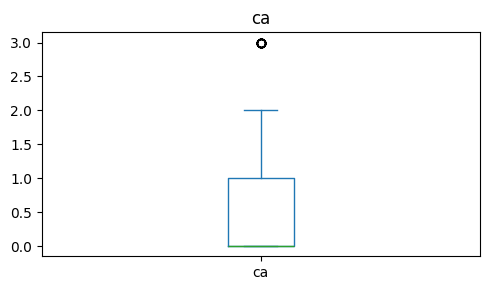

In [112]:
# null values in ca column has greater than 10% so we firstly check outliers
plt.figure(figsize=(5, 3))
df['ca'].plot(kind='box',title='ca')
plt.tight_layout()
plt.show()

# outliers exist:
# imputation technique: median


In [113]:
df['ca'].fillna(df['ca'].median(), inplace=True)

# Check for missing values
null_values_percent = f'{(df.isnull().mean() * 100).round(2)}'
print(null_values_percent)

id           0.00
age          0.00
sex          0.00
origin       0.00
cp           0.00
trestbps     0.00
chol         0.00
fbs          0.00
restecg      0.00
thalch       0.00
exang        0.00
oldpeak      0.00
slope       28.24
ca           0.00
thal        45.95
num          0.00
dtype: float64


In [114]:
# thal and slope Columns has data type category so we can use mode method
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)

# Check for missing values
null_values_percent = f'{(df.isnull().mean() * 100).round(2)}'
print(null_values_percent)

id          0.0
age         0.0
sex         0.0
origin      0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64


<ipython-input-114-4a2ce4cd65c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thal'].fillna(df['thal'].mode()[0], inplace=True)
<ipython-input-114-4a2ce4cd65c9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

**8. EDA**

`1. General Information`

In [193]:
#How many rows and columns are in the dataset?
print(f"rows: {df.shape[0]}\ncolumns: {df.shape[1]}")

rows: 740
columns: 16


In [194]:
#Are there any missing values in the dataset?
print(f"missing values: {df.isnull().sum().sum()}")

missing values: 0


`2. Target Variable Analysis`

In [196]:
# What is the distribution of the target variable (presence of heart disease: 0 or 1)?
df['num'].value_counts()

,count
num,
0,357
1,204
2,79
3,78
4,22


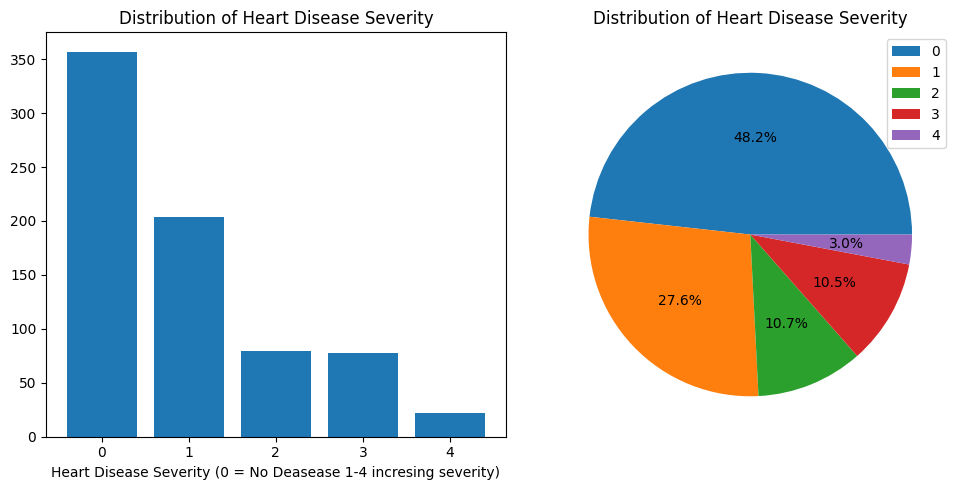

In [198]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].bar(df['num'].value_counts().index, df['num'].value_counts().values)
ax[0].set_title('Distribution of Heart Disease Severity')
ax[0].set_xlabel('Heart Disease Severity (0 = No Deasease 1-4 incresing severity)')

ax[1].pie(df['num'].value_counts(), autopct='%1.1f%%')
ax[1].legend(labels=df['num'].value_counts().index)
ax[1].set_title('Distribution of Heart Disease Severity')

plt.tight_layout()
plt.show()

In [204]:
# Count the number of patients without and with heart disease
no_heart_disease = df['num'].value_counts().get(0, 0)
with_heart_disease = len(df) - no_heart_disease
print(f"Patients without heart disease: {no_heart_disease}")
print(f"Patients with heart disease: {with_heart_disease}")



Patients without heart disease: 357
Patients with heart disease: 383


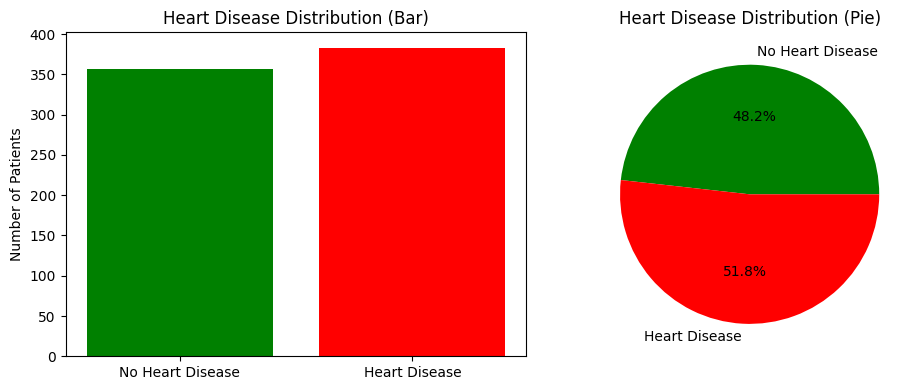

In [205]:
# Count the number of patients without and with heart disease
no_heart_disease = df['num'].value_counts().get(0, 0)
with_heart_disease = len(df) - no_heart_disease

# Data for visualization
labels = ['No Heart Disease', 'Heart Disease']
counts = [no_heart_disease, with_heart_disease]

# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Bar Chart
ax[0].bar(labels, counts, color=['green', 'red'])
ax[0].set_title('Heart Disease Distribution (Bar)')
ax[0].set_ylabel('Number of Patients')

# Pie Chart
ax[1].pie(counts, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
ax[1].set_title('Heart Disease Distribution (Pie)')

# Adjust layout and display
plt.tight_layout()
plt.show()



**3. Demographic Insights**

In [206]:
#What is the age range of patients in the dataset?
print(df['age'].describe() )
print('minimum age range of person is: ',df['age'].min())
print('maximum age range of person is:',df['age'].max())

count    740.000000
mean      53.097297
std        9.408127
min       28.000000
25%       46.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64
minimum age range of person is:  28
maximum age range of person is: 77


In [208]:
#What is the gender distribution of the patients?

gender_distribution = df['sex'].value_counts()

# Display the results
print("Gender Distribution:")
print(gender_distribution)


Gender Distribution:
sex
Male      566
Female    174
Name: count, dtype: int64


<ipython-input-214-4970707e4b9d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = [gender_distribution.get(0, 0), gender_distribution.get(1, 0)]


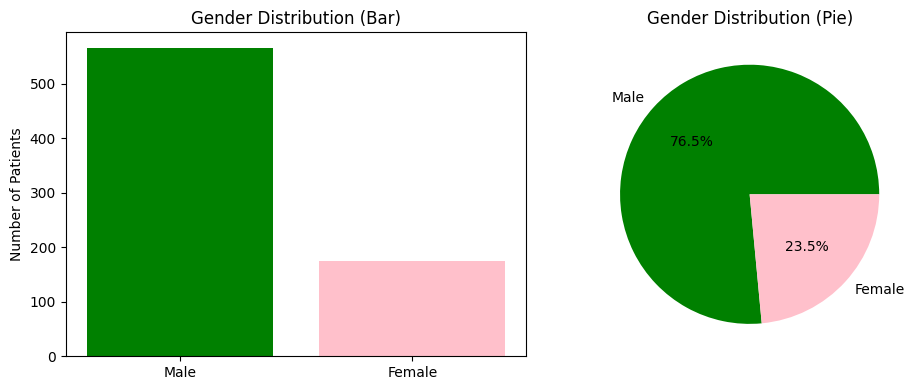

In [214]:
# Data for visualization
labels = ['Male', 'Female']
counts = [gender_distribution.get(0, 0), gender_distribution.get(1, 0)]

# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Bar Chart
ax[0].bar(labels, counts, color=['green', 'pink'])
ax[0].set_title('Gender Distribution (Bar)')
ax[0].set_ylabel('Number of Patients')

# Pie Chart
ax[1].pie(counts, labels=labels, autopct='%1.1f%%', colors=['green', 'pink'])
ax[1].set_title('Gender Distribution (Pie)')

# Adjust layout and display
plt.tight_layout()
plt.show()


**4. Health Metrics**

In [223]:
# What are the average and median values of:
  # ○ Resting blood pressure (trestbps)?
  # ○ Serum cholesterol (chol)?
  # ○ Maximum heart rate (thalch)?

print(f"average of trestbps: {round(df['trestbps'].mean(),2)} median of trestbps: {round(df['trestbps'].median(),2)}")
print(f"average of chol: {round(df['chol'].mean(),2)} median of chol: {round(df['chol'].median(),2)}")
print(f"average of thalch: {round(df['thalch'].mean(),2)} median of thalch: {round(df['thalch'].median(),2)}")


average of trestbps: 132.75 median of trestbps: 130.0
average of chol: 220.14 median of chol: 231.0
average of thalch: 138.74 median of thalch: 140.0


**5. Categorical Features**

In [224]:
#How many patients have exercise-induced angina (exang)?
exang_counts = df['exang'].value_counts()

# Display the results
print(f"Exercise-Induced Angina Counts: {exang_counts}")

Exercise-Induced Angina Counts: exang
False    444
True     296
Name: count, dtype: int64


<ipython-input-226-913a1a827db1>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = [exang_counts.get(0, 0), exang_counts.get(1, 0)]


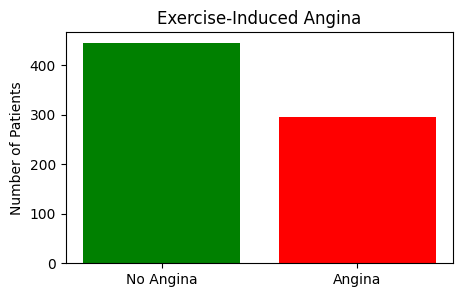

In [226]:
# Data for visualization
labels = ['No Angina', 'Angina']
counts = [exang_counts.get(0, 0), exang_counts.get(1, 0)]

# Bar Chart
plt.figure(figsize=(5, 3))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Exercise-Induced Angina')
plt.ylabel('Number of Patients')
plt.show()


In [227]:
# Count of different chest pain types
cp_counts = df['cp'].value_counts()

# Display the results
print("Chest Pain Type Counts:")
print(cp_counts)


Chest Pain Type Counts:
cp
asymptomatic       392
non-anginal        161
atypical angina    150
typical angina      37
Name: count, dtype: int64


<ipython-input-229-07ce1b2f8141>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = [cp_counts.get(0, 0), cp_counts.get(1, 0), cp_counts.get(2, 0), cp_counts.get(3, 0)]


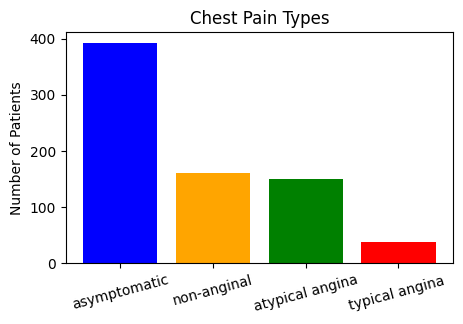

In [229]:
# Data for visualization
labels = ['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina ']
counts = [cp_counts.get(0, 0), cp_counts.get(1, 0), cp_counts.get(2, 0), cp_counts.get(3, 0)]

# Bar Chart
plt.figure(figsize=(5, 3))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red'])
plt.title('Chest Pain Types')
plt.ylabel('Number of Patients')
plt.xticks(rotation=15)
plt.show()


**6. Visual Analysis**

<ipython-input-233-1d02eadbc559>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True, color='blue')


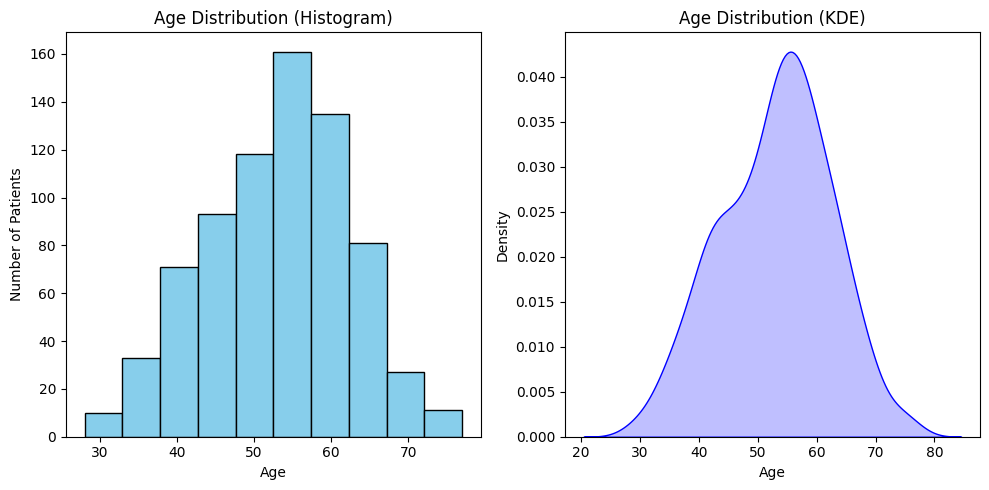

In [233]:
# Plot the age distribution
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution (Histogram)')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['age'], shade=True, color='blue')
plt.title('Age Distribution (KDE)')
plt.xlabel('Age')

plt.tight_layout()
plt.show()


<ipython-input-236-a0f332c08aa9>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chol_mean = df.groupby('num')['chol'].mean()


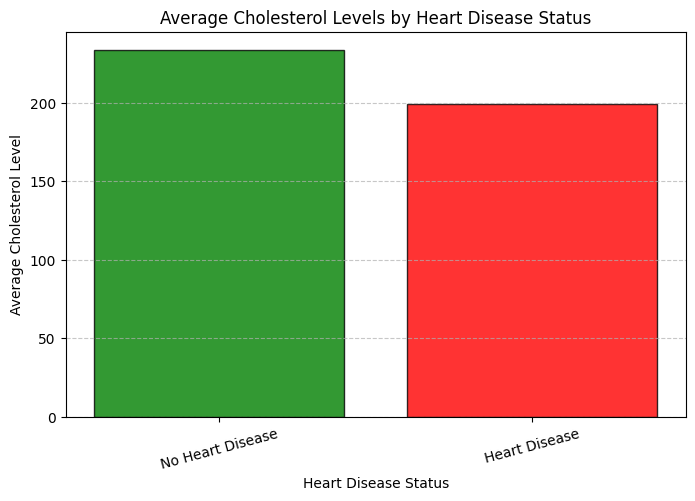

Average Cholesterol Levels:
- No Heart Disease: 233.34
- Heart Disease: 199.00


In [236]:
#Compare the average cholesterol levels between patients with and without heart
#disease.

chol_mean = df.groupby('num')['chol'].mean()

# Separate the data for visualization
labels = ['No Heart Disease', 'Heart Disease']
chol_values = [chol_mean.get(0, 0), chol_mean[chol_mean.index != 0].mean()]

# Plot the comparison
plt.figure(figsize=(8, 5))
plt.bar(labels, chol_values, color=['green', 'red'], alpha=0.8, edgecolor='black')
plt.title('Average Cholesterol Levels by Heart Disease Status')
plt.ylabel('Average Cholesterol Level')
plt.xlabel('Heart Disease Status')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print numerical values
print(f"Average Cholesterol Levels:")
print(f"- No Heart Disease: {chol_values[0]:.2f}")
print(f"- Heart Disease: {chol_values[1]:.2f}")


**7. Outliers**

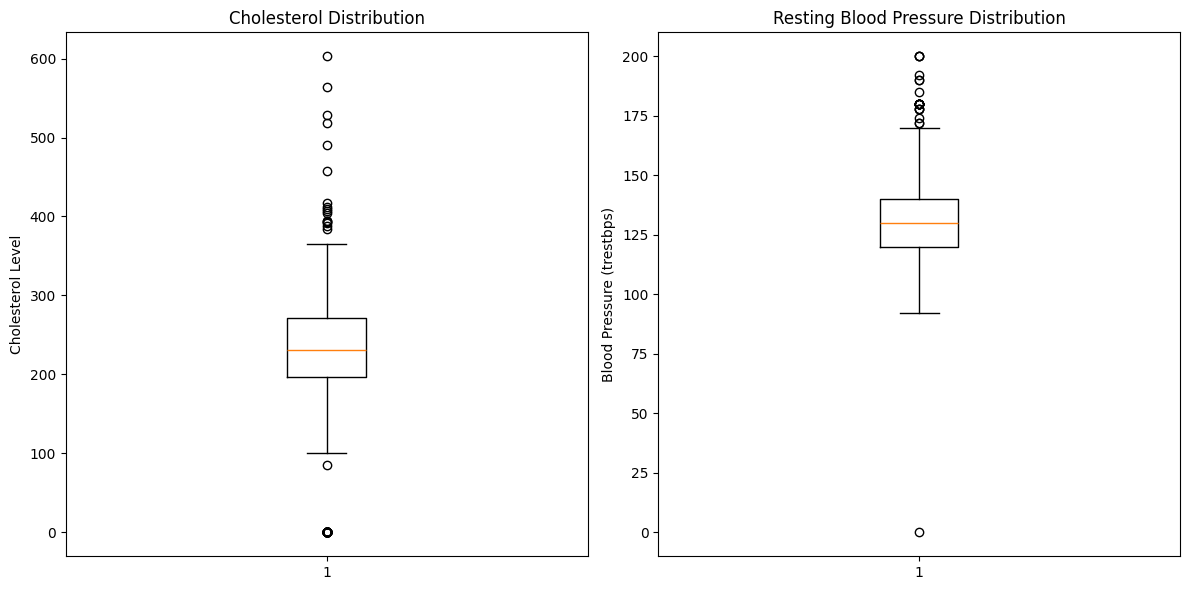

In [237]:
# Are there any outliers in cholesterol (chol) or resting blood pressure (trestbps)?

import matplotlib.pyplot as plt

# Create a figure and axes for the box plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for cholesterol (chol)
ax[0].boxplot(df['chol'])
ax[0].set_title('Cholesterol Distribution')
ax[0].set_ylabel('Cholesterol Level')

# Box plot for resting blood pressure (trestbps)
ax[1].boxplot(df['trestbps'])
ax[1].set_title('Resting Blood Pressure Distribution')
ax[1].set_ylabel('Blood Pressure (trestbps)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
